<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-05-01-panel-regression-linear-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1.  Linear Models for Panel Data in R

This tutorial demonstrates how to perform panel linear regression using the {plm} package in R. Panel regression is a statistical technique used to analyze datasets that combine both cross-sectional and time-series data, known as panel data or longitudinal data. This method accounts for multiple observations of the same entities (e.g., individuals, firms, countries) over time, enabling researchers to control for variables that vary across entities or time periods but are unobserved or unmeasured.

## Overview

Panel data, also known as longitudinal or cross-sectional time-series data, consists of observations on multiple entities (such as individuals, firms, or countries) over multiple time periods. Linear models for panel data are statistical methods used to analyze such data, accounting for both cross-sectional and time-series variations.

The `{plm}` package in R provides tools and functions for econometric analysis of panel data. It allows for the estimation of linear panel models, which are useful for analyzing datasets that contain observations on multiple entities (such as individuals, firms, or countries) over multiple time periods.

Several models can be estimated with plm by filling the model argument:

- the fixed effects model (`"within"`), the default,
- the pooling model (`"pooling"`),
- the first-difference model (`"fd"`),
- the between model (`"between"`), -
- the error components model (`"random"`).


## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314972 sha256=8a5ab24bf4cb6c158913d0a31801caad42847b8b027ce9f8e59c3d73ed0f308d
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:




In [ ]:
%%R
packages <- c('tidyverse',
              'DataExplorer',
              'dlookr',
              'DataExplorer',
              'rstatix',
              'corrplot',
              'Hmisc',
              'tseries',
              'stargazer',
              'plm',
              'panelr',
              'pglm',
              'AER',
              'corrplot',
              'lmtest',
              'ggstatsplot',
              'gtsummary',
              'ggExtra',
              'gridExtra',
              'kableExtra',
              'GGally',
              'gplots'
                )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method            from
  as.zoo.data.frame zoo 



   tidyverse DataExplorer       dlookr DataExplorer      rstatix     corrplot 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
       Hmisc      tseries    stargazer          plm       panelr         pglm 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
         AER     corrplot       lmtest  ggstatsplot    gtsummary      ggExtra 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
   gridExtra   kableExtra       GGally       gplots 
        TRUE         TRUE         TRUE         TRUE 


## Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:gplots"       "package:GGally"       "package:kableExtra"  
 [4] "package:gridExtra"    "package:ggExtra"      "package:gtsummary"   
 [7] "package:ggstatsplot"  "package:AER"          "package:survival"    
[10] "package:sandwich"     "package:lmtest"       "package:zoo"         
[13] "package:car"          "package:carData"      "package:pglm"        
[16] "package:maxLik"       "package:miscTools"    "package:panelr"      
[19] "package:lme4"         "package:Matrix"       "package:plm"         
[22] "package:stargazer"    "package:tseries"      "package:Hmisc"       
[25] "package:corrplot"     "package:rstatix"      "package:dlookr"      
[28] "package:DataExplorer" "package:lubridate"    "package:forcats"     
[31] "package:stringr"      "package:dplyr"        "package:purrr"       
[34] "package:readr"        "package:tidyr"        "package:tibble"      
[37] "package:ggplot2"      "package:tidyverse"    "package:tools"       
[40] "pa

## Data

For this tutorial, we will use the Cost Data for U.S. Airlines. The dataset is derived from the NYU Stern School of Business's Econometric Analysis, 5th Edition. It includes cross-sectional data on the costs of U.S. airlines over 15 years, from 1970 to 1984, with 90 observations on 6 airline firms. The dataset contains the following variables:

-   `I (Airline)`: Refers to six different airline companies being examined.

-   `T (Year)`: Represents the years under analysis, spanning from 1970 to 1984 (15 years).

-   `PF (Fuel Price)`: Indicates the global average price for aviation jet fuel at refineries. Prices are set by multi-year contracts between airlines and suppliers, remaining stable despite market fluctuations.

-   `LF (Load Factor)`: Measures how much of an airline's passenger capacity is utilized, influenced by seating capacity, routes, and demand.

-   `Q (Revenue Passenger Miles)`: A key metric showing the miles traveled by paying passengers, commonly used in airline traffic statistics.

-   `C (Cost) (in thousands)`: Influenced by Fuel Price, Load Factor, Lease and Depreciation, Aircraft Maintenance, Labor, and Airport Handling Charges.



In [ ]:
%%R
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/airlines_data.csv") |>
  glimpse()

Rows: 90 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): I, T, C, Q, PF, LF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 90
Columns: 6
$ I  <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2…
$ T  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1, 2, 3, 4, 5, 6…
$ C  <dbl> 1140640, 1215690, 1309570, 1511530, 1676730, 1823740, 2022890, 2314…
$ Q  <dbl> 0.952757, 0.986757, 1.091980, 1.175780, 1.160170, 1.173760, 1.29051…
$ PF <dbl> 106650, 110307, 110574, 121974, 196606, 265609, 263451, 316411, 384…
$ LF <dbl> 0.534487, 0.532328, 0.547736, 0.540846, 0.591167, 0.575417, 0.59449…


#### Data Processing

In [ ]:
%%R
# assigening names to the columns
lookup <- c(Airline = "I",
            Year =  "T",
            Cost = "C"
 )
my.data<-mf |>
    # Rename using a named vector and `all_of()`
  dplyr::rename(all_of(lookup)) |>
  # Convert to factors
  dplyr::mutate(across(c(Airline, Year), factor)) |>
  # Rename the factor levels
  dplyr:: mutate(Year = dplyr::recode(Year,
         '1' = '1970',
         '2' = '1971',
         '3' = '1972',
         '4' = '1973',
         '5' = '1974',
         '6' = '1975',
         '7' = '1976',
         '8' = '1977',
         '9' = '1978',
         '10' = '1979',
         '11' = '1980',
         '12' = '1981',
         '13' = '1982',
         '14' = '1983',
         '15' = '1984'
     ) )
str(my.data)

tibble [90 × 6] (S3: tbl_df/tbl/data.frame)
 $ Airline: Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year   : Factor w/ 15 levels "1970","1971",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Cost   : num [1:90] 1140640 1215690 1309570 1511530 1676730 ...
 $ Q      : num [1:90] 0.953 0.987 1.092 1.176 1.16 ...
 $ PF     : num [1:90] 106650 110307 110574 121974 196606 ...
 $ LF     : num [1:90] 0.534 0.532 0.548 0.541 0.591 ...


#### Data Exploration

In [ ]:
%%R
dlookr::diagnose(my.data)

# A tibble: 6 × 6
  variables types   missing_count missing_percent unique_count unique_rate
  <chr>     <chr>           <int>           <dbl>        <int>       <dbl>
1 Airline   factor              0               0            6      0.0667
2 Year      factor              0               0           15      0.167 
3 Cost      numeric             0               0           90      1     
4 Q         numeric             0               0           90      1     
5 PF        numeric             0               0           90      1     
6 LF        numeric             0               0           90      1     


In [ ]:
%%R
my.data |>
  # First select  numerical columns
  dplyr::select(Cost, PF, LF, Q)  |>
  gtsummary::tbl_summary()

# A tibble: 90 × 4
      Cost     PF    LF     Q
     <dbl>  <dbl> <dbl> <dbl>
 1 1140640 106650 0.534 0.953
 2 1215690 110307 0.532 0.987
 3 1309570 110574 0.548 1.09 
 4 1511530 121974 0.541 1.18 
 5 1676730 196606 0.591 1.16 
 6 1823740 265609 0.575 1.17 
 7 2022890 263451 0.594 1.29 
 8 2314760 316411 0.597 1.39 
 9 2639160 384110 0.639 1.61 
10 3247620 569251 0.676 1.83 
# ℹ 80 more rows
# ℹ Use `print(n = ...)` to see more rows


### Visualize the Hetereogeneity

Hterogeneity across airlines can be visualized using a `plotmean()` function of {gplots} package. The plot shows the distribution of mean costs with CI for each airline, allowing us to compare the cost structures of different airlines.

#### Across Airlines

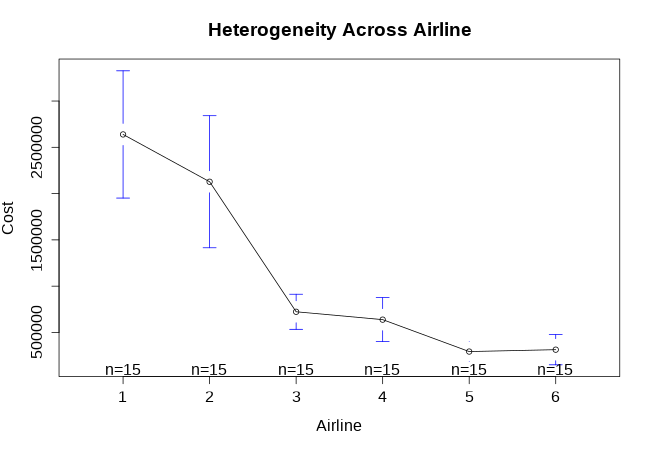

In [ ]:
%%R -w 650 -h 450 -u px
plotmeans(Cost~Airline ,
          main = 'Heterogeneity Across Airline', data = my.data)

The plot shows the mean cost for each airline over the 15-year period, with confidence intervals indicating the variability in costs. The plot provides a visual representation of the heterogeneity in costs across airlines.

#### Across Years

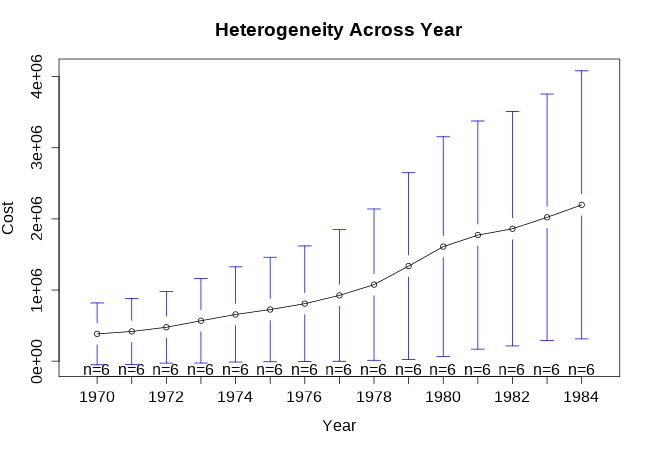

In [ ]:
%%R -w 650 -h 450 -u px
plotmeans(Cost~Year ,
          main = 'Heterogeneity Across Year',
          data = my.data)

`coplot()` function of {gplots} package can be used to create a conditioned scatterplot matrix of the Cost variable by Year and Airline. This plot allows us to visualize the relationship between Cost and Year for each airline separately.

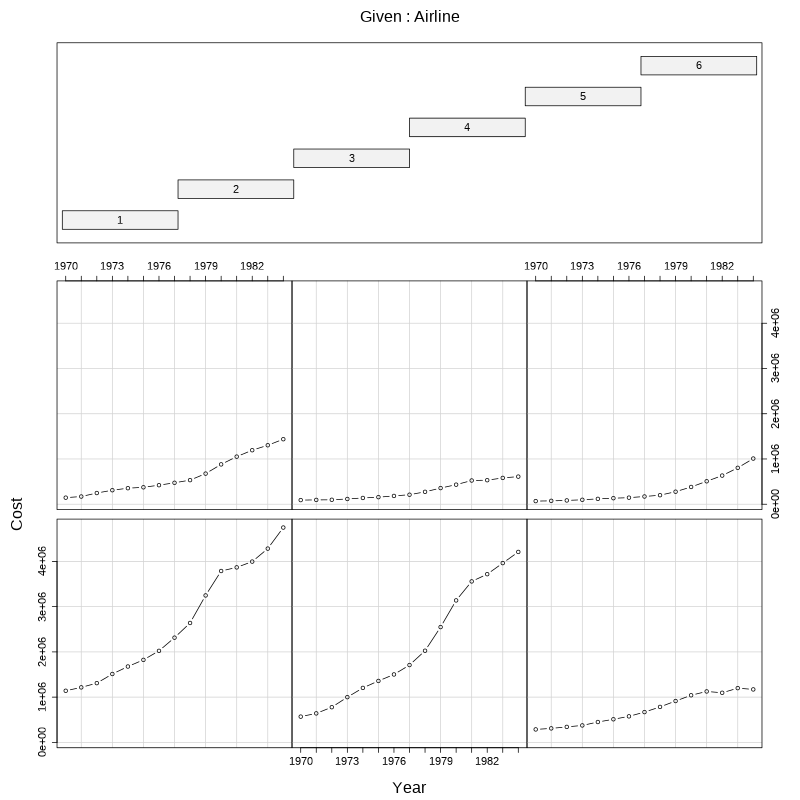

In [ ]:
%%R -w 800 -h 800 -u px
coplot( Cost~ Year|Airline, type="b", data=my.data)

### Panel Data Transformation

Panel data is typically transformed into a `pdata.frame()` object for panel regression analysis. This object includes an index that identifies the entity (e.g., individual, firm) and the time period.

In [ ]:
%%R
my.pd <- pdata.frame(my.data, index = c("Airline", "Year"))
head(my.pd)

       Airline Year    Cost        Q     PF       LF
1-1970       1 1970 1140640 0.952757 106650 0.534487
1-1971       1 1971 1215690 0.986757 110307 0.532328
1-1972       1 1972 1309570 1.091980 110574 0.547736
1-1973       1 1973 1511530 1.175780 121974 0.540846
1-1974       1 1974 1676730 1.160170 196606 0.591167
1-1975       1 1975 1823740 1.173760 265609 0.575417


In [ ]:
%%R
# panel data dimension
pdim(my.pd)

Balanced Panel: n = 6, T = 15, N = 90


## Pooled OLS Regression

`Pooled OLS Regression` is a statistical method that applies the `Ordinary Least Squares (OLS)` technique to `panel data` (data with both cross-sectional and time-series dimensions) `without accounting for the panel structure`. It treats all observations as independent, even if they belong to the same entity (e.g., firm, country, or individual) over time.

Here's how it differs from standard `OLS regression`:

| **Aspect** | **Pooled OLS** | **Standard OLS** |
|------------------|---------------------------|---------------------------|
| `Data Type` | Panel data (cross-sectional + time-series). | Cross-sectional or time-series data. |
| `Independence` | Assumes all observations are independent (often unrealistic in panel data). | Assumes independence (valid for non-panel data). |
| `Unobserved Effects` | Does *not* control for entity/time effects (risk of omitted variable bias). | No need to control for panel-specific effects. |
| `Efficiency` | Likely inefficient due to autocorrelation/heteroscedasticity. | Efficient if Gauss-Markov assumptions hold. |


A study analyzing the impact of education ($X$) on income ($Y$) across 10 countries over 5 years without considering country-specific or time-specific differences:

$$ Y_{it} = \beta_0 + \beta_1 X_{it} + u_{it} $$

where:

-   $i$ represents the country,
-   $t$ represents the time period,
-   $u_{it}$ is the error term.


Limitations of Pooled OLS are below:

1.  `Omitted Variable Bias`:\
    Fails to account for `unobserved heterogeneity` (e.g., company culture, geography) that is constant over time or across entities.\
    Example: If firms have unobserved traits affecting, Pooled OLS estimates will be biased.

2.  `Autocorrelation`:\
    Repeated observations of the same entity over time often violate the "no autocorrelation" assumption.

3.  `Inefficient Standard Errors`:\
    Heteroscedasticity (unequal variance) across entities or time is common but unaddressed.

Use Pooled OLS:

-   When `entity/time effects are negligible` (rare in practice).\
-   As a `baseline model` before applying more advanced panel methods (e.g., fixed effects, random effects).\
-   When data is insufficient for advanced techniques (e.g., short time periods).

### Fit Pooled OLS Model

`plm()` function of {plm} package is used to estimate the `Pooled OLS` model. The model formula specifies the dependent variable (Cost) and independent variables (Q, PF, LF). The `data` argument specifies the panel data frame, and the `model` argument specifies the estimation method (`"pooling"` for Pooled OLS).

In [ ]:
%%R
# Fit Pooled OLS model
pooled.model<-plm(Cost ~ Q + PF + LF,
               data = my.data,
               model = "pooling")


Pooling Model

Call:
plm(formula = Cost ~ Q + PF + LF, data = my.data, model = "pooling")

Balanced Panel: n = 6, T = 15, N = 90

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-520654 -250270   37333  208690  849700 

Coefficients:
               Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept)  1.1586e+06  3.6059e+05  3.2129   0.00185 ** 
Q            2.0261e+06  6.1807e+04 32.7813 < 2.2e-16 ***
PF           1.2253e+00  1.0372e-01 11.8138 < 2.2e-16 ***
LF          -3.0658e+06  6.9633e+05 -4.4027 3.058e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1.2647e+14
Residual Sum of Squares: 6.8177e+12
R-Squared:      0.94609
Adj. R-Squared: 0.94421
F-statistic: 503.118 on 3 and 86 DF, p-value: < 2.22e-16


In [ ]:
%%R
stargazer(pooled.model,
          report = "vc*stp",
          type = "text")


                 Dependent variable:    
             ---------------------------
                        Cost            
----------------------------------------
Q                 2,026,114.000***      
                    (61,806.940)        
                     t = 32.781         
                      p = 0.000         
                                        
PF                    1.225***          
                       (0.104)          
                     t = 11.814         
                      p = 0.000         
                                        
LF                -3,065,753.000***     
                    (696,327.300)       
                     t = -4.403         
                     p = 0.00004        
                                        
Constant          1,158,559.000***      
                    (360,592.700)       
                      t = 3.213         
                      p = 0.002         
                                        
---------------

In [ ]:
%%R
kable(tidy(pooled.model), digits=3,
           caption="Pooled model")



Table: Pooled model

|term        |     estimate|  std.error| statistic| p.value|
|:-----------|------------:|----------:|---------:|-------:|
|(Intercept) |  1158559.201| 360592.720|     3.213|   0.002|
|Q           |  2026114.340|  61806.945|    32.781|   0.000|
|PF          |        1.225|      0.104|    11.814|   0.000|
|LF          | -3065753.131| 696327.318|    -4.403|   0.000|


From above results, we can see that the `Pooled OLS` model estimates the coefficients for each independent variable. The `Q`, `PF`, and `LF` variables are included in the model. The coefficients, standard errors, t-statistics, and p-values are reported for each variable. The `R-squared` value indicates the proportion of variance explained by the model. The effect of these variales on coast is statistically significant at the 5% level.



`coeftest()` function {lmtest} package performs z and (quasi-) Wald tests of estimated coefficients. `coefci()` computes the corresponding Wald confidence intervals. The `vcovHC()` function of {plm} package computes heteroskedasticity-robust covariance matrix estimators for panel data models. The `type` argument specifies the type of robust standard errors to compute (e.g., HC0, HC1, HC2, HC3). The `cluster` argument specifies the variable used for clustering standard errors (e.g., "group" for entity-level clustering). Wald tests are used to test the null hypothesis that the coefficients are equal to zero.

In [ ]:
%%R
tbl.pooled.model <- tidy(lmtest::coeftest(pooled.model,
                             vcov=vcovHC(pooled.model,
                            type="HC0",
                            cluster="group")))
kable(tbl.pooled.model, digits=5, caption= "Pooled OLS model with cluster robust standard errors")



Table: Pooled OLS model with cluster robust standard errors

|term        |      estimate|    std.error| statistic| p.value|
|:-----------|-------------:|------------:|---------:|-------:|
|(Intercept) |  1.158559e+06| 4.084793e+05|   2.83627| 0.00569|
|Q           |  2.026114e+06| 7.951013e+04|  25.48247| 0.00000|
|PF          |  1.225350e+00| 3.487600e-01|   3.51345| 0.00071|
|LF          | -3.065753e+06| 1.017051e+06|  -3.01436| 0.00338|




The `performance()` function of {performance} package computes various performance metrics for the model, including the `R-squared`, `adjusted R-squared`, `F-statistic`, and `p-value`. These metrics help evaluate the goodness of fit and statistical significance of the model.

In [ ]:
%%R
performance::performance(pooled.model)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 | R2 (adj.) |      RMSE |     Sigma
--------------------------------------------------------------------------
2519.975 | 2520.689 | 2532.474 | 0.946 |     0.944 | 2.752e+05 | 2.816e+05


### Testing for Heteroscedasticity

`Heteroscedasticity` refers to the situation where the variance of the errors differs across observations. One common way to test for heteroscedasticity in R is by using the `Breusch-Pagan test`. The `bptest()` function of {lmtest} package performs the Breusch-Pagan test for heteroscedasticity in the residuals of the model. The test assesses whether the variance of the residuals is constant across observations. The null hypothesis is that the residuals are homoscedastic (constant variance).

In [ ]:
%%R
# Perform the Breusch-Pagan test
lmtest::bptest(pooled.model)


	studentized Breusch-Pagan test

data:  pooled.model
BP = 24.082, df = 3, p-value = 2.401e-05



From above results, the p-value of the Breusch-Pagan test is less than 0.05, indicating that we reject the null hypothesis of homoscedasticity. This suggests that the residuals in the Pooled OLS model exhibit heteroscedasticity.


## Fixed Effects Model

`Fixed Effects (FE) Panel Regression` is a method designed to analyze panel data (data with both cross-sectional and time-series dimensions) by `controlling for unobserved, time-invariant heterogeneity` across entities (e.g., firms, countries, individuals). Unlike Pooled OLS, which ignores the panel structure, FE explicitly accounts for entity-specific or time-specific characteristics that could bias results.

A study analyzing the effect of working hours ($X$) on employee productivity ((Y)) in different companies over time, accounting for company-specific characteristics.

$$ Y_{it} = \beta X_{it} + \alpha_i + u_{it} $$

where:

- $\alpha_i$ is the individual-specific effect (company-specific fixed effect).

-   The `Within Transformation` is used to eliminate $\alpha_i$, typically by demeaning the data.

**How FE Differs from Pooled OLS**:

| **Aspect** | **Fixed Effects (FE)** | **Pooled OLS** |
|------------------|-----------------------------|-------------------------|
| `Unobserved Heterogeneity` | Controls for `entity-specific/time-specific` effects (e.g., firm culture, stable policies). | Ignores unobserved heterogeneity, leading to `omitted variable bias` if $\alpha_i$ correlates with $X_{it}$. |
| `Data Used` | Uses only `within-entity variation` (changes over time). | Uses `both within and between variation` (treats all observations as independent). |
| `Efficiency` | Less efficient than Pooled OLS (loses between-variation), but `unbiased` if $\alpha_i$ correlates with $X_{it}$. | More efficient if no omitted variable bias, but `biased` if $\alpha_i$ correlates with $X_{it}$. |
| `Time-Invariant Variables` | Cannot estimate coefficients for variables that do not vary over time (e.g., country area). | Can estimate coefficients for time-invariant variables. |
| `Error Structure` | Allows for `autocorrelation` within entities (clustered standard errors often used). | Assumes i.i.d errors, which is often violated in panel data. |

**When to Use FE vs. Pooled OLS**:

1.  Use FE if*:
    -   Unobserved entity-specific factors (e.g., corporate culture, geography) are suspected to correlate with regressors.\
    -   Focus is on `within-entity relationships` (e.g., "How does increasing R&D `within a firm` affect its profits?").
2.  Use Pooled OLS if:
    -   Entity/time effects are negligible (unlikely in practice).\
    -   You need to estimate effects of time-invariant variables (e.g., gender, geography).


The fixed effects model can be estimated using various methods, including:

1. `Least Squares Dummy Variable (LSDV) Approach:`
   This involves including dummy variables for each entity to capture the individual-specific intercepts.

2. `Within Transformation:`
   This method involves subtracting the entity-specific means from the variables to eliminate the individual-specific intercepts.

3. `First Differences:`
   This approach involves differencing the data to remove the individual-specific intercepts.

Fixed Effects regression addresses the critical flaw of Pooled OLS— `omitted variable bias from unobserved heterogeneity`—by isolating within-entity variation. While less efficient, FE provides unbiased estimates when entity-specific traits correlate with regressors. Pooled OLS, though simpler, risks severe bias in such cases and is best used as a baseline or when heterogeneity is irrelevant.



### Least Squares Dummy Variable (LSDV) Approach

 The Least Squares Dummy Variable (LSDV) model is a method used in fixed effect panel regression to account for individual-specific effects by including dummy variables for each entity. This method allows us to control for unobserved heterogeneity by including a separate intercept for each entity (Ariline).

The LSDV model can be written as:

$$ y_{it} = \alpha + \beta x_{it} + \sum_{i=1}^{N-1} \gamma_i D_i + \epsilon_{it} $$

Where:

- $y_{it}$ is the dependent variable for entity $i$ at time $t$
- $\alpha$ is the overall intercept
- $x_{it}$ is the explanatory variable for entity $i$ at time $t$
- $\beta$ is the coefficient for the explanatory variable $x_{it}$
- $D_i$ is a dummy variable for entity $i$ (1 if the observation belongs to entity $i$, 0 otherwise)
- $\gamma_i$ is the coefficient for the dummy variable $D_i$
- $\epsilon_{it}$ is the error term

The LSDV model allows us to estimate the effect of the explanatory variable $x_{it}$ while controlling for entity-specific effects. The dummy variables capture the entity-specific intercepts, allowing us to account for unobserved heterogeneity that is constant over time.

The `plm()` function of {plm} package is used to estimate the `Fixed Effects (FE)` model using the `Least Squares Dummy Variable (LSDV)` approach. The model formula specifies the dependent variable (Cost) and independent variables (Q, PF, LF).

In [ ]:
%%R
# Fit fixedx-effect model
fixed.lsdv<-plm(Cost ~ Q + PF + LF+
                    factor(Airline)-1,
               data = my.pd)


In [ ]:
%%R
stargazer(fixed.lsdv,
          report = "vc*stp",
          type = "text")


                 Dependent variable:    
             ---------------------------
                        Cost            
----------------------------------------
Q                 3,319,023.000***      
                    (171,354.100)       
                     t = 19.369         
                      p = 0.000         
                                        
PF                    0.773***          
                       (0.097)          
                      t = 7.944         
                      p = 0.000         
                                        
LF                -3,797,368.000***     
                    (613,773.100)       
                     t = -6.187         
                     p = 0.00000        
                                        
----------------------------------------
Observations             90             
R2                      0.929           
Adjusted R2             0.922           
F Statistic    355.254*** (df = 3; 81)  
Note:        *p

In [ ]:
%%R
performance::performance(fixed.lsdv)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 | R2 (adj.) |      RMSE |     Sigma
--------------------------------------------------------------------------
2460.164 | 2460.634 | 2470.163 | 0.929 |     0.922 | 1.996e+05 | 2.030e+05


### Fixed Effects Model using Within Model

`plm()` function of {plm} package is used to estimate the `Fixed Effects (FE)` model. The model formula specifies the dependent variable (Cost) and independent variables (Q, PF, LF). The `data` argument specifies the panel data frame, and the `model` argument specifies the estimation method (`"within"` for FE).

#### One-way Fixed Effects Model

One-way fixed effect model is used to estimate the effect of the explanatory variables while controlling for individual-specific effects. The `within` transformation is applied to the data to remove the individual-specific intercepts. The model formula specifies the dependent variable (Cost) and independent variables (Q, PF, LF).

In [ ]:
%%R
# Fit fixedx-effect model
fixed.model.one<-plm(Cost ~ Q + PF + LF,
               data = my.pd,
               model = "within")


In [ ]:
%%R
stargazer(fixed.model.one,
          report = "vc*stp",
          type = "text")


                 Dependent variable:    
             ---------------------------
                        Cost            
----------------------------------------
Q                 3,319,023.000***      
                    (171,354.100)       
                     t = 19.369         
                      p = 0.000         
                                        
PF                    0.773***          
                       (0.097)          
                      t = 7.944         
                      p = 0.000         
                                        
LF                -3,797,368.000***     
                    (613,773.100)       
                     t = -6.187         
                     p = 0.00000        
                                        
----------------------------------------
Observations             90             
R2                      0.929           
Adjusted R2             0.922           
F Statistic    355.254*** (df = 3; 81)  
Note:        *p

The fixed effects of a fixed effects model may be extracted easily using `fixef()`. An argument type indicates how fixed effects should be computed: in levels by `type = "level"` (the default), in deviations from the overall mean by `type = "dmean"` or in deviations from the first individual by `type = "dfirst"`

In [ ]:
%%R
summary(fixef(fixed.model.one, type = "dmean"))

  Estimate Std. Error t-value  Pr(>|t|)    
1 -1208539     350777 -3.4453 0.0009064 ***
2  -606806     309078 -1.9633 0.0530462 .  
3   128642     332355  0.3871 0.6997261    
4   569053     318348  1.7875 0.0775943 .  
5   619714     334776  1.8511 0.0677955 .  
6   497936     307316  1.6203 0.1090609    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
performance::performance(fixed.model.one)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 | R2 (adj.) |      RMSE |     Sigma
--------------------------------------------------------------------------
2460.164 | 2460.634 | 2470.163 | 0.929 |     0.922 | 1.996e+05 | 2.030e+05


#### Twoway Fixed Effects Model

In case of a two-ways fixed effect model, argument `effect` is relevant in function `fixef` to extract specific effect fixed effects with possible values `"individual"` for individual fixed effects (default for two-ways fixed effect models), `"time"` for time fixed effects, and `"twoways"` for the sum of individual and time fixed effects. Example to extract the time fixed effects from a two-ways model:

In [ ]:
%%R
# Fit fixedx-effect model
fixed.model.two<-plm(Cost ~ Q + PF + LF,
               data = my.pd,
               model = "within",
               effect = "twoways")


In [ ]:
%%R
stargazer(fixed.model.two,
          report = "vc*stp",
          type = "text")


                 Dependent variable:    
             ---------------------------
                        Cost            
----------------------------------------
Q                 3,416,062.000***      
                    (203,851.000)       
                     t = 16.758         
                      p = 0.000         
                                        
PF                      1.515           
                       (2.377)          
                      t = 0.637         
                      p = 0.527         
                                        
LF                -2,926,555.000***     
                   (1,075,797.000)      
                     t = -2.720         
                      p = 0.009         
                                        
----------------------------------------
Observations             90             
R2                      0.814           
Adjusted R2             0.753           
F Statistic    97.570*** (df = 3; 67)   
Note:        *p

In [ ]:
%%R
summary(fixef(fixed.model.two, effect = "time"))

       Estimate
1970  -792073.7
1971  -777889.2
1972  -793917.9
1973  -872165.3
1974  -842423.9
1975  -921339.8
1976 -1002737.7
1977 -1072031.0
1978 -1141541.9
1979 -1387679.6
1980 -1503236.8
1981 -1521504.0
1982 -1477666.4
1983 -1470034.9
1984 -1391129.0


### Testing for Fixed Effects (Observed Heterogeneity)

The `pFtest()` function is used to perform the `F-test` for fixed effects in panel data regression models. This test is used to determine whether the fixed effects model is significantly better than the pooled OLS model. In other words, it tests whether individual-specific effects are necessary to account for unobserved heterogeneity in the data.

In [ ]:
%%R
pFtest(fixed.lsdv, pooled.model)



	F test for individual effects

data:  Cost ~ Q + PF + LF + factor(Airline) - 1
F = 14.595, df1 = 5, df2 = 81, p-value = 3.467e-10
alternative hypothesis: significant effects



In [ ]:
%%R
# Perform the F-test for fixed effects
pFtest(fixed.model.one, pooled.model)


	F test for individual effects

data:  Cost ~ Q + PF + LF
F = 14.595, df1 = 5, df2 = 81, p-value = 3.467e-10
alternative hypothesis: significant effects



In [ ]:
%%R
# Perform the F-test for fixed effects
pFtest(fixed.model.two, pooled.model)


	F test for twoways effects

data:  Cost ~ Q + PF + LF
F = 3.7313, df1 = 19, df2 = 67, p-value = 3.319e-05
alternative hypothesis: significant effects





The p-value of the F-test is lower than 0.05 (reject the null hypothesis), indicating that the fixed model is significantly better than the pooled model. This suggests that individual-specific effects are necessary to account for unobserved heterogeneity in the data.


## Random Effect Model

`Random Effects (RE) Panel Regression` is a method used to analyze panel data by accounting for unobserved heterogeneity across entities (e.g., firms, countries, individuals) that is uncorrelated with the explanatory variables. Unlike Fixed Effects (FE) models, which control for entity-specific effects, Random Effects models allow for entity-specific effects that are uncorrelated with the regressors. In RE models, it is assumed that the individual-specific effects are uncorrelated with the explanatory variables. This method allows for more efficient estimates compared to fixed effects (FE) models when the assumption of no correlation holds true.

Key Features of Random Effects Model are:

1. `Random Individual-specific Effects:`
   The RE model includes random individual-specific effects that are assumed to be uncorrelated with the explanatory variables. These effects capture unobserved heterogeneity across entities.

2. `Efficiency:`
   By assuming that individual-specific effects are random, the RE model uses both within-entity and between-entity variations, making it more efficient than the fixed effects model.

3. `Generalization:`
   The RE model generalizes the fixed effects model by allowing for the possibility that individual-specific effects are not fixed but random.


The RE model can be written as:

$$ y_{it} = \alpha + \beta x_{it} + u_i + \epsilon_{it} $$
Where:

- $y_{it}$ is the dependent variable for entity $i$ at time $t$
- $\alpha$ is the overall intercept
- $x_{it}$ is the explanatory variable for entity $i$ at time $t$
- $\beta$ is the coefficient for the explanatory variable $x_{it}$
- $u_i$ is the random effect specific to entity $i$
- $\epsilon_{it}$ is the idiosyncratic error term


In the RE model, $u_i$ is treated as a random variable that follows a normal distribution with mean zero and variance $\sigma_u^2$.

Differences between Random Effects and Fixed Effects Models are summarized below:


| Feature              | Random Effects (RE) Model                     | Fixed Effects (FE) Model                          |
|----------------------|-----------------------------------------------|---------------------------------------------------|
| Correlation          | Assumes no correlation between $u_i$ and $x_{it}$ | Assumes $u_i$ is correlated with $x_{it}$ |
| Efficiency           | More efficient if the assumption holds true   | Less efficient due to loss of degrees of freedom  |
| Estimation           | Uses Generalized Least Squares (GLS)          | Uses Least Squares Dummy Variable (LSDV) or Within Estimator |
| Interpretation       | Considers both within and between variation   | Considers only within variation                   |
| Dummy Variables      | Does not include dummy variables for entities | Includes dummy variables for each entity          |

### Fit Random Effects Model

The `plm()` function of {plm} package is used to estimate the `Random Effects (RE)` model. The model formula specifies the dependent variable (Cost) and independent variables (Q, PF, LF). The `data` argument specifies the panel data frame, and the `model` argument specifies the estimation method (`"random"` for RE). Argument `random.method` is the variance component the random effects model. The default is `swar` (the Swamy-Arora estimator).

Four estimators of this parameter are available, depending on the value of the argument random.method:

- `"swar"`: from Swamy and Arora (1972), the default value,
- `"walhus"`: from Wallace and Hussain (1969),
- `"amemiya"`: from T. Amemiya (1971),
- `"nerlove"`: from Nerlove (1971).
- `"ht"`: for Hausman-Taylor-type instrumental variable (IV) estimation,

#### One-way Random-effect model

In [ ]:
%%R
# Fit One-way Random-effect model
random.model.one<-plm(Cost ~ Q + PF + LF,
               data = my.pd,
               model = "random",
               random.method="swar")


Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = Cost ~ Q + PF + LF, data = my.pd, model = "random", 
    random.method = "swar")

Balanced Panel: n = 6, T = 15, N = 90

Effects:
                    var   std.dev share
idiosyncratic 4.428e+10 2.104e+05 0.793
individual    1.154e+10 1.074e+05 0.207
theta: 0.5486

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-535726 -238494   49890  207491  722934 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)  1.0743e+06  3.7747e+05  2.8461  0.004427 ** 
Q            2.2886e+06  1.0949e+05 20.9015 < 2.2e-16 ***
PF           1.1236e+00  1.0344e-01 10.8622 < 2.2e-16 ***
LF          -3.0850e+06  7.2568e+05 -4.2512 2.126e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    6.6198e+13
Residual Sum of Squares: 5.8721e+12
R-Squared:      0.91129
Adj. R-Squared: 0.9082
Chisq: 883.501 on 3 DF, p-value: < 2.22e-16


In [ ]:
%%R
stargazer(random.model.one,
          report = "vc*stp",
          type = "text")


                 Dependent variable:    
             ---------------------------
                        Cost            
----------------------------------------
Q                 2,288,588.000***      
                    (109,493.700)       
                     t = 20.902         
                      p = 0.000         
                                        
PF                    1.124***          
                       (0.103)          
                     t = 10.862         
                      p = 0.000         
                                        
LF                -3,084,994.000***     
                    (725,679.800)       
                     t = -4.251         
                     p = 0.00003        
                                        
Constant          1,074,293.000***      
                    (377,468.000)       
                      t = 2.846         
                      p = 0.005         
                                        
---------------

The estimation of the variance of the error components are performed using the `ercomp()` function, which has a method and an effect argument, and can be used by itself:

In [ ]:
%%R
ercomp(random.model.one, effect = "twoways")

                    var   std.dev share
idiosyncratic 4.428e+10 2.104e+05 0.793
individual    1.154e+10 1.074e+05 0.207
theta: 0.5486


In [ ]:
%%R
performance::performance(random.model.one)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 | R2 (adj.) |      RMSE |     Sigma
--------------------------------------------------------------------------
2506.537 | 2507.251 | 2519.036 | 0.911 |     0.908 | 2.554e+05 | 2.613e+05


#### Two-ways Random-effect model

The default behavior of `plm()` is to introduce individual effects. Using the effect argument, one may also introduce:

- time effects (`effect = "time"`),
- individual and time effects (`effect = "twoways"`).

In [ ]:
%%R
# Fit two-way random effect model
random.model.two<-plm(Cost ~ Q + PF + LF,
               data = my.pd,
               model = "random",
               effect = "twoways",
               random.method="swar")


In [ ]:
%%R
stargazer(random.model.two,
          report = "vc*stp",
          type = "text")


                 Dependent variable:    
             ---------------------------
                        Cost            
----------------------------------------
Q                 2,260,137.000***      
                    (105,825.300)       
                     t = 21.357         
                      p = 0.000         
                                        
PF                    1.134***          
                       (0.103)          
                     t = 10.955         
                      p = 0.000         
                                        
LF                -3,070,229.000***     
                    (727,083.300)       
                     t = -4.223         
                     p = 0.00003        
                                        
Constant          1,076,780.000***      
                    (377,896.900)       
                      t = 2.849         
                      p = 0.005         
                                        
---------------

In [ ]:
%%R
performance::performance(random.model.two)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 | R2 (adj.) |      RMSE |     Sigma
--------------------------------------------------------------------------
2507.636 | 2508.350 | 2520.135 | 0.913 |     0.910 | 2.570e+05 | 2.629e+05


### Test for Random Effects

The H`ausman test is used to compare the random effects model with the fixed effects model. It tests whether the individual-specific effects are correlated with the explanatory variables. If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that the fixed effects model is more appropriate.

- **Null Hypothesis (H0):** The individual-specific effects are uncorrelated with the explanatory variables (RE model is appropriate).
- **Alternative Hypothesis (H1):** The individual-specific effects are correlated with the explanatory variables (FE model is appropriate).

If the p-value is less than the chosen significance level, we reject the null hypothesis and conclude that the fixed effects model is more appropriate.

The `phtest()` function is used to perform the Hausman test, which helps compare the fixed effects (FE) model with the random effects (RE) model in panel data analysis.


In [ ]:
%%R
phtest(fixed.model.one, random.model.one)


	Hausman Test

data:  Cost ~ Q + PF + LF
chisq = 61.505, df = 3, p-value = 2.803e-13
alternative hypothesis: one model is inconsistent



In [ ]:
%%R
phtest(fixed.model.two, random.model.two)


	Hausman Test

data:  Cost ~ Q + PF + LF
chisq = 61.505, df = 3, p-value = 2.803e-13
alternative hypothesis: one model is inconsistent




The p-value of the `Hausman test` is less than 0.05, indicating that we reject the null hypothesis of no correlation between individual-specific effects and the explanatory variables. This suggests that the fixed effects model is more appropriate than the random effects model.

## Dynamic Panel Regression (GMM)

Dynamic Panel Regression using Generalized Method of Moments (GMM) is a statistical technique used to estimate panel data models that include lagged dependent variables as regressors. This method is particularly useful when dealing with endogeneity issues, where explanatory variables are correlated with the error term. GMM helps in obtaining consistent and efficient estimates by using instrumental variables.

Key Concepts in Dynamic Panel Regression include:

1. `Lagged Dependent Variable`: The previous values of the dependent variable are used as regressors.
2. `Endogeneity`: When explanatory variables are correlated with the error term.
3. `Instrumental Variables`: Variables that are uncorrelated with the error term and can be used as instruments to address endogeneity.
4. `GMM Estimation`: A method that uses moment conditions to obtain parameter estimates.

The dynamic panel data model can be written as:

$$ y_{it} = \alpha y_{it-1} + \beta x_{it} + \epsilon_{it} $$
Where:

- $y_{it}$ is the dependent variable for entity $i$ at time $t$
- $y_{it-1}$ is the lagged dependent variable
- $x_{it}$ is a vector of explanatory variables
- $\alpha$ and $\beta$ are the coefficients to be estimated
- $\epsilon_{it}$ is the error term

### Data

In this example, we will estimate a dynamic panel model with a lagged dependent variable as a regressor. We use `Produc`` dataset from the {plm} package for this example. Dataset is a panel of  48 observations from 1970 to 1986 and contains following variables:

`state:` the state

`year`: the year

`region`: the region

`pcap`: public capital stock

`hwy`: highway and streets

`water`: water and sewer facilities

`util`: other public buildings and structures

`pc`: private capital stock

`gsp`: gross state product

`emp`: labor input measured by the employment in non–agricultural payrolls

`unemp`: state unemployment rate

In [ ]:
%%R
# Load sample data
data("EmplUK", package = "plm")
# Define a panel data frame
pdata <- pdata.frame(EmplUK, index = c("firm", "year"))
head(pdata)

       firm year sector   emp    wage capital   output
1-1977    1 1977      7 5.041 13.1516  0.5894  95.7072
1-1978    1 1978      7 5.600 12.3018  0.6318  97.3569
1-1979    1 1979      7 5.015 12.8395  0.6771  99.6083
1-1980    1 1980      7 4.715 13.8039  0.6171 100.5501
1-1981    1 1981      7 4.093 14.2897  0.5076  99.5581
1-1982    1 1982      7 3.166 14.8681  0.4229  98.6151


### Fit Dynamic Panel Regression (GMM) Model

To perform dynamic panel regression using GMM in R, we can use the {plm} package along with the `pgmm()` function. The `pgmm()` function estimates the model using the Generalized Method of Moments (GMM) approach.

* `pgmm` function is used to fit a Generalized Method of Moments (GMM) model.
* `emp ~ lag(emp, 1) + capital + output` specifies the regression formula where `emp` (employment) is the dependent variable, and lagged employment (`lag(emp, 1)`), capital, and output are the independent variables.
* `lag(emp, 2:99)` specifies the instruments, which in this case are lagged values of employment from the second lag onwards.
* `effect = "twoways"` indicates that both individual and time effects are included in the model.
* `model = "twosteps"` specifies that the two-step GMM estimator is used.

In [ ]:
%%R
# Fit the GMM model
# Example model: Employment (emp) as a function of lagged employment (lag(emp)), capital (capital), and output (output)
gmm_model <- pgmm(emp ~ lag(emp, 1) + capital + output | lag(emp, 2:99), data = pdata,
                  effect = "twoways",
                  model = "twosteps")
summary(gmm_model)

Twoways effects Two-steps model Difference GMM 

Call:
pgmm(formula = emp ~ lag(emp, 1) + capital + output | lag(emp, 
    2:99), data = pdata, effect = "twoways", model = "twosteps")

Unbalanced Panel: n = 140, T = 7-9, N = 1031

Number of Observations Used: 751
Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-26.2233  -0.1014   0.0000  -0.0489   0.1542  24.0927 

Coefficients:
            Estimate Std. Error z-value Pr(>|z|)   
lag(emp, 1)  0.73118    0.25733  2.8414 0.004491 **
capital      0.77554    0.65885  1.1771 0.239151   
output      -0.02177    0.02082 -1.0456 0.295729   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sargan test: chisq(27) = 56.24425 (p-value = 0.00080133)
Autocorrelation test (1): normal = -1.264517 (p-value = 0.20604)
Autocorrelation test (2): normal = -1.609374 (p-value = 0.10753)
Wald test for coefficients: chisq(3) = 67.09298 (p-value = 1.7888e-14)
Wald test for time dummies: chisq(7) = 9.752898 (p-value = 0.20301

- `Coefficients`**:` The coefficients for the lagged dependent variable and the explanatory variables represent their effects on the dependent variable.
- `Sargan Test`: Tests the validity of the instruments. A high p-value indicates that the instruments are valid.
- `AR(1) and AR(2) Tests`: Test for serial correlation in the error term. The AR(1) test should reject the null hypothesis (indicating first-order serial correlation), while the AR(2) test should not reject the null hypothesis (indicating no second-order serial correlation).
- `waldtest`: Tests the joint significance of the coefficients. A low p-value indicates that at least one coefficient is significantly different from zero.


## Variable Coefficients Model

Variable Coefficients Model for Panel Data allow regression coefficients to vary across entities (e.g., firms, states) or time periods. Unlike standard fixed/random effects models (which assume constant slopes), these models capture heterogeneity in how variables affect outcomes. Common types include:

1. Random Coefficients Models (RCM)**:  
   Coefficients are treated as random variables drawn from a distribution (e.g., normal).  
   Example: Swamy’s model, which estimates mean coefficients and their variance across entities.

2. Fixed Coefficients by Group:  
   Coefficients differ across predefined groups (e.g., regions) but are fixed within groups.
   
   
Key Differences Between Models are as follows:

| **Model**              | **Assumption**                          | **Use Case**                               |
|------------------------|-----------------------------------------|--------------------------------------------|
| `Fixed Coefficients` | Coefficients differ across entities (fixed). | When group-specific effects are distinct (e.g., policy impacts vary by state). |
| `Random Coefficients`| Coefficients follow a distribution.     | When coefficients are heterogeneous but share a common structure. |


Variable Coefficients Models` are useful when:

- `Policy Analysis`: If a tax policy’s effect differs across states.  
- `Firm Studies`: When R&D spending impacts vary by industry.  
- `Efficiency`: Use random coefficients if you want to generalize beyond the sample.  

Limitations

- `Fixed Models`: Lose efficiency if many groups exist.  
- `Random Models`: Require distributional assumptions (e.g., normality).  

### Data

The `Produc` dataset (from the `plm` package) contains U.S. state-level macroeconomic data (1970–1986). We’ll model gross state product (`gsp`) as a function of public capital (`pcap`), private capital (`pc`), employment (`emp`), and unemployment rate (`unemp`).

In [ ]:
%%R
data("Produc", package = "plm")
# Convert to panel data format
pdata <- pdata.frame(Produc, index = c("state", "year"))

### Fixed Coefficients Model (by State)

Estimate separate coefficients for each state using the **`pvcm()`** function with `model = "within"`:

In [ ]:
%%R
# Fixed coefficients (by state)
fe_variable <- pvcm(log(gsp) ~ log(pcap) + log(pc) + log(emp) + unemp,
                    data = pdata, model = "within")

summary(fe_variable)

Oneway (individual) effect No-pooling model

Call:
pvcm(formula = log(gsp) ~ log(pcap) + log(pc) + log(emp) + unemp, 
    data = pdata, model = "within")

Balanced Panel: n = 48, T = 17, N = 816

Residuals:
         Min.       1st Qu.        Median       3rd Qu.          Max. 
-0.0828078889 -0.0118150348  0.0004246566  0.0126479124  0.1189647497 

Coefficients:
  (Intercept)       log(pcap)          log(pc)            log(emp)       
 Min.   :-3.708   Min.   :-1.4426   Min.   :-0.52365   Min.   :-0.02584  
 1st Qu.: 1.229   1st Qu.:-0.5065   1st Qu.:-0.02584   1st Qu.: 0.61569  
 Median : 2.733   Median :-0.1086   Median : 0.23335   Median : 0.87256  
 Mean   : 2.672   Mean   :-0.1049   Mean   : 0.21825   Mean   : 0.93348  
 3rd Qu.: 4.214   3rd Qu.: 0.2682   3rd Qu.: 0.41768   3rd Qu.: 1.25307  
 Max.   : 9.338   Max.   : 1.0312   Max.   : 1.23217   Max.   : 2.10582  
     unemp          
 Min.   :-0.027617  
 1st Qu.:-0.012080  
 Median :-0.003905  
 Mean   :-0.003722  
 3rd Qu.: 0.0


  - Each state has its own coefficients (not shown here for brevity).  
  - Use `fe_variable$coefficients` to view state-specific estimates.


### Random Coefficients Model (Swamy’s Model)

Estimate the mean and variance of coefficients across states using `model = "random"`:

In [ ]:
%%R
# Random coefficients (Swamy’s model)
re_variable <- pvcm(log(gsp) ~ log(pcap) + log(pc) + log(emp) + unemp,
                    data = pdata, model = "random")

summary(re_variable)

Oneway (individual) effect Random coefficients model

Call:
pvcm(formula = log(gsp) ~ log(pcap) + log(pc) + log(emp) + unemp, 
    data = pdata, model = "random")

Balanced Panel: n = 48, T = 17, N = 816

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.27874 -0.03826  0.03301  0.03531  0.08882  0.71105 

Estimated mean of the coefficients:
              Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)  2.5660617  0.4646077  5.5231 3.331e-08 ***
log(pcap)   -0.0786281  0.0890076 -0.8834 0.3770276    
log(pc)      0.2124359  0.0569555  3.7299 0.0001916 ***
log(emp)     0.9245679  0.0837552 11.0389 < 2.2e-16 ***
unemp       -0.0040549  0.0018892 -2.1464 0.0318437 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Estimated variance of the coefficients:
            (Intercept) log(pcap)    log(pc)   log(emp)       unemp
(Intercept)   8.1735012 -1.124405  0.1967614  0.0736650  0.00495130
log(pcap)    -1.1244046  0.306534 -0.0874932 -0.1182381 -

## General Feasible Generalized Least Squares (FGGLS) Models

General Feasible Generalized Least Squares (FGGLS) Models is an estimation technique used to address `heteroscedasticity` (unequal error variance) and `autocorrelation` (correlated errors over time/space) in regression models. Unlike OLS, which assumes constant variance and uncorrelated errors, FGLS estimates the error structure from the data and uses it to weight observations, yielding `efficient and unbiased coefficients`. In panel data, FGLS often models `random effects` or `correlated errors across entities/time`.

FGLS Workflow are as follows:

1. `Estimate Initial Model`: Fit a model via OLS and extract residuals.  
2. `Estimate Error Structure`: Use residuals to model heteroscedasticity/autocorrelation (e.g., using variance components).  
3. `Re-estimate Model`: Apply weights derived from the error structure to compute FGLS estimates.  

Key Features of FGLS in Panel Data are as follows:

1.`Handles Heteroscedasticity/Autocorrelation`: Adjusts standard errors for efficiency.  
2. `Random Effects`: Models unobserved state-specific effects as uncorrelated with regressors (unlike fixed effects).  
3. `Flexible Covariance Structures`: Can model time-series correlation (e.g., AR(1)) with additional arguments.  

Comparison with Other Models are as follows:
| **Model**      | **Pros**                                  | **Cons**                                  |
|-----------------|-------------------------------------------|-------------------------------------------|
| `Pooled OLS`  | Simple, estimates time-invariant variables. | Biased if unobserved heterogeneity exists. |
| `Fixed Effects` | Controls for entity-specific effects.     | Inefficient if no autocorrelation/heteroscedasticity. |
| `FGLS`        | Efficient, handles complex error structures. | Requires correct specification of error structure. |


### Data

In this example, we'll use the `Produc` dataset from the `plm` package, which contains U.S. state-level macroeconomic data (1970–1986). We'll model gross state product (`gsp`) as a function of public capital (`pcap`), private capital (`pc`), employment (`emp`), and unemployment rate (`unemp`).

- `Mean coefficients`: Average effect across states (similar to pooled OLS but accounts for heterogeneity).  
- `Variance`: Measures how much coefficients vary across states.

### Fit FGLS Model with `pggls()`

The `pggls()` function in `plm` fits FGLS models for panel data. Use `model = "random"` for random effects FGLS:

In [ ]:
%%R
# Fit FGLS model (random effects with general covariance structure)
fgls_model <- pggls(log(gsp) ~ log(pcap) + log(pc) + log(emp) + unemp,
                    data = pdata,
                    model = "random",  # Adjust for random effects
                    effect = "individual")  # State-specific effects

# View results
summary(fgls_model)

Oneway (individual) effect General FGLS model

Call:
pggls(formula = log(gsp) ~ log(pcap) + log(pc) + log(emp) + unemp, 
    data = pdata, effect = "individual", model = "random")

Balanced Panel: n = 48, T = 17, N = 816

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.255736 -0.070199 -0.014124 -0.008909  0.039118  0.455461 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)  2.26388494  0.10077679 22.4643 < 2.2e-16 ***
log(pcap)    0.10566584  0.02004106  5.2725 1.346e-07 ***
log(pc)      0.21643137  0.01539471 14.0588 < 2.2e-16 ***
log(emp)     0.71293894  0.01863632 38.2553 < 2.2e-16 ***
unemp       -0.00447265  0.00045214 -9.8921 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Total Sum of Squares: 849.81
Residual Sum of Squares: 7.5587
Multiple R-squared: 0.99111


- `Coefficients`:  
  - A 1% increase in private capital (`pc`) is associated with a `0.31% increase` in gross state product (significant at 1%).  
  - Unemployment (`unemp`) has a small negative effect.  
- `Variance Components`:  
  - `individual` (0.0665): Significant state-specific heterogeneity.  
  - `idios` (0.0275): Idiosyncratic error variance.  
- `Theta (0.752)`: Weight given to between-state variation vs. within-state variation.  



## Summary and Conclusions

This tutorial demonstrated how to perform panel linear regression using the {plm} package in R. Panel regression is a statistical technique used to analyze datasets that combine both cross-sectional and time-series data, known as panel data or longitudinal data. This method accounts for multiple observations of the same entities (e.g., individuals, firms, countries) over time, enabling researchers to control for variables that vary across entities or time periods but are unobserved or unmeasured. We covered different types of linear panel regression models, including Pooled OLS, Fixed Effects, Random Effects, Dynamic Panel Regression, Variable Coefficients Model, and General Feasible Generalized Least Squares (FGLS) Models. Each model has its own assumptions, advantages, and limitations, making it suitable for different research questions and data structures. By using panel regression techniques, researchers can obtain more accurate and reliable estimates of the relationships between variables in panel data, leading to better insights and policy recommendations.


## References

1.  [Panel Regression](https://rpubs.com/lumumba99/1011604)

2.  [Panel Data Regression in R: An Introduction to Longitudinal Data analysis](https://medium.com/@akif.iips/panel-data-regression-in-r-a38ac8559f7f)

3.  [Panel data econometrics in R](https://cran.r-project.org/web/packages/plm/vignettes/A_plmPackage.html)

4.  [R Tutorial: Panel Data Analysis 1](https://rpubs.com/phle/r_tutorial_panel_data_analysis)



